In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")
df = pd.read_csv('Q1_data.csv')


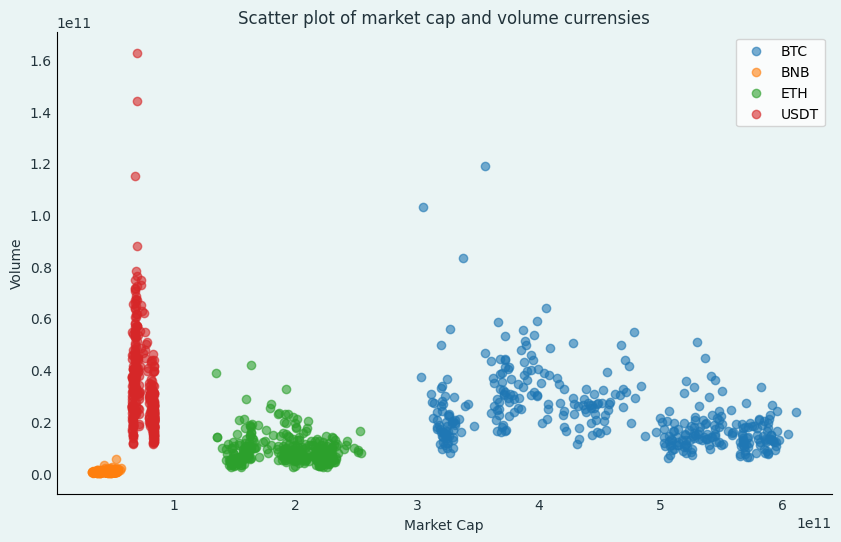

In [75]:
market_cap, volume = df.market_cap, df.volume

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df[df['symbol']=='BTC']["market_cap"], df[df['symbol']=='BTC']["volume"], marker="o", cmap="viridis", alpha=0.6, label='BTC')
ax.scatter(df[df['symbol']=='BNB']["market_cap"], df[df['symbol']=='BNB']["volume"], marker="o", cmap="viridis", alpha=0.6, label='BNB')
ax.scatter(df[df['symbol']=='ETH']["market_cap"], df[df['symbol']=='ETH']["volume"], marker="o", cmap="viridis", alpha=0.6, label='ETH')
ax.scatter(df[df['symbol']=='USDT']["market_cap"], df[df['symbol']=='USDT']["volume"], marker="o", cmap="viridis", alpha=0.6, label='USDT')
ax.set_title(
    "Scatter plot of market cap and volume currensies", fontsize=12, color="#22333b"
)
ax.set_ylabel("Volume", fontsize=10, color="#22333b")
ax.set_xlabel("Market Cap", fontsize=10, color="#22333b")
ax.tick_params(axis="both", length=0, labelcolor="#22333b")
ax.set_facecolor("#EAF4f4")
ax.legend()
fig.set_facecolor("#EAF4f4")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


Implementation of DBScan


Now we scale the dataframe and then use DBScan for different values of epsilon and minimum samples that we require to count the data as core point.
in the end we found that best result is developed from choosing (min_pts = 10, eps = 0.21) and (min_pts = 15, eps = 0.25).
so we deeply check the different epsilon values for min_points = 15 to check how the DBScan worksout.


---

Now we will check with min_pts = 15 when we increase eps from 0.1 to higher, how the model changes.

Minimum Points = 15
Eps = 0.1

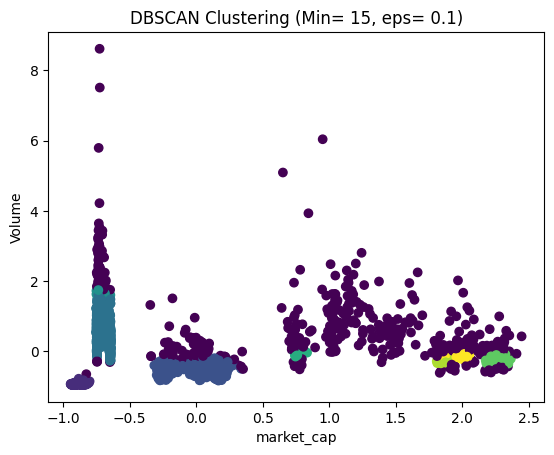

In [76]:
data = df

# Scaling the MarketCap and Volume
scaler = StandardScaler()
data[['market_cap', 'volume']] = scaler.fit_transform(data[['market_cap', 'volume']])

#DBSCAN parameters
eps = 0.1
min_samples = 15

# DBScan Function
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['cluster'] = dbscan.fit_predict(data[['market_cap', 'volume']])

# Visualizing 
plt.scatter(data['market_cap'], data['volume'], c=data['cluster'], cmap='viridis')
plt.title('DBSCAN Clustering (Min= 15, eps= 0.1)')
plt.xlabel('market_cap')
plt.ylabel('Volume')
plt.show()



Minimum Points = 15
Eps = 0.15

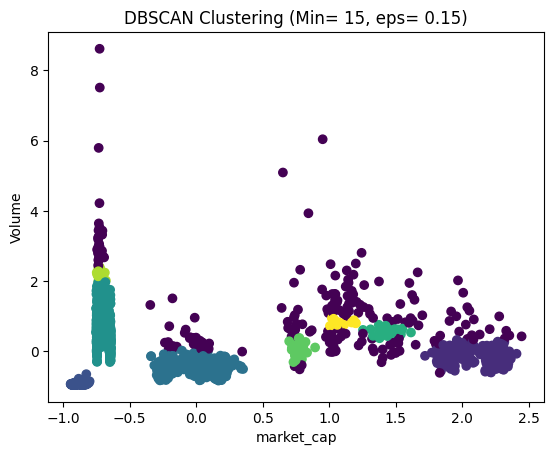

In [77]:
data = df

# Scaling the MarketCap and Volume
scaler = StandardScaler()
data[['market_cap', 'volume']] = scaler.fit_transform(data[['market_cap', 'volume']])

#DBSCAN parameters
eps = 0.15
min_samples = 15

# DBScan Function
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['cluster'] = dbscan.fit_predict(data[['market_cap', 'volume']])

# Visualizing 
plt.scatter(data['market_cap'], data['volume'], c=data['cluster'], cmap='viridis')
plt.title('DBSCAN Clustering (Min= 15, eps= 0.15)')
plt.xlabel('market_cap')
plt.ylabel('Volume')
plt.show()



Minimum Points = 15
Eps = 0.18

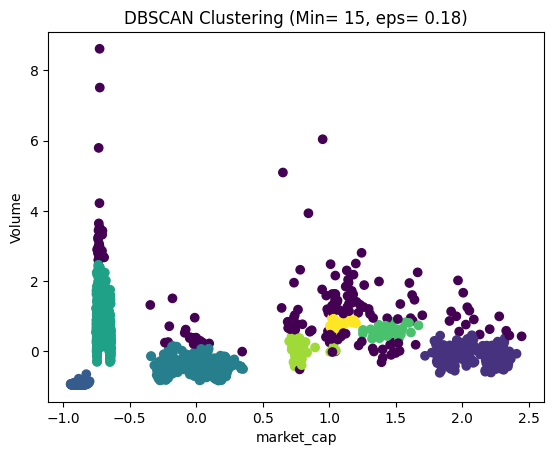

In [78]:
data = df

# Scaling the MarketCap and Volume
scaler = StandardScaler()
data[['market_cap', 'volume']] = scaler.fit_transform(data[['market_cap', 'volume']])

#DBSCAN parameters
eps = 0.18
min_samples = 15

# DBScan Function
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['cluster'] = dbscan.fit_predict(data[['market_cap', 'volume']])

# Visualizing 
plt.scatter(data['market_cap'], data['volume'], c=data['cluster'], cmap='viridis')
plt.title('DBSCAN Clustering (Min= 15, eps= 0.18)')
plt.xlabel('market_cap')
plt.ylabel('Volume')
plt.show()



Minimum Points = 15
Eps = 0.21

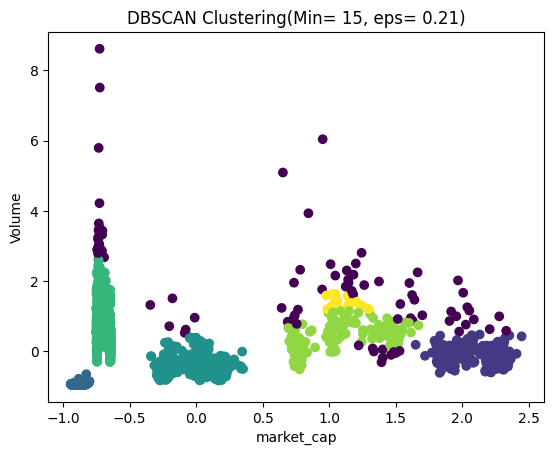

In [79]:
data = df

# Scaling the MarketCap and Volume
scaler = StandardScaler()
data[['market_cap', 'volume']] = scaler.fit_transform(data[['market_cap', 'volume']])

#DBSCAN parameters
eps = 0.21
min_samples = 15

# DBScan Function
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['cluster'] = dbscan.fit_predict(data[['market_cap', 'volume']])

# Visualizing 
plt.scatter(data['market_cap'], data['volume'], c=data['cluster'], cmap='viridis')
plt.title('DBSCAN Clustering(Min= 15, eps= 0.21)')
plt.xlabel('market_cap')
plt.ylabel('Volume')
plt.show()



Minimum Points = 15
Eps = 0.23

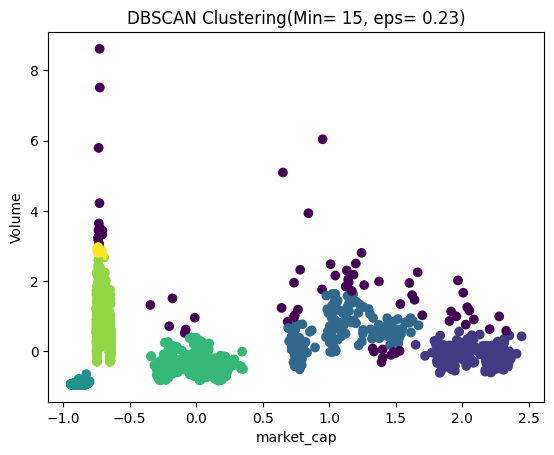

In [80]:
data = df

# Scaling the MarketCap and Volume
scaler = StandardScaler()
data[['market_cap', 'volume']] = scaler.fit_transform(data[['market_cap', 'volume']])

#DBSCAN parameters
eps = 0.23
min_samples = 15

# DBScan Function
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['cluster'] = dbscan.fit_predict(data[['market_cap', 'volume']])

# Visualizing 
plt.scatter(data['market_cap'], data['volume'], c=data['cluster'], cmap='viridis')
plt.title('DBSCAN Clustering(Min= 15, eps= 0.23)')
plt.xlabel('market_cap')
plt.ylabel('Volume')
plt.show()



Now we reached to our best case =>
Minimum Points = 15
Eps = 0.25

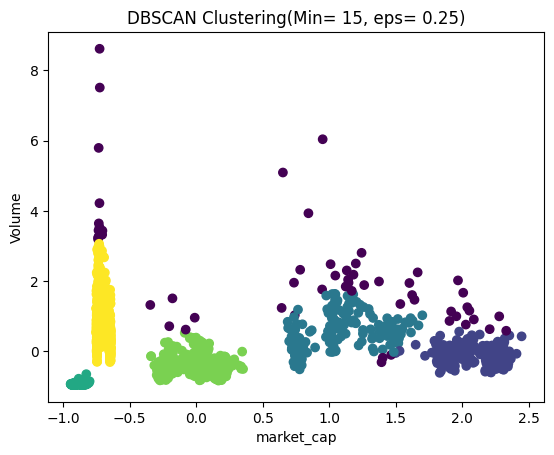

In [81]:
data = df

# Scaling the MarketCap and Volume
scaler = StandardScaler()
data[['market_cap', 'volume']] = scaler.fit_transform(data[['market_cap', 'volume']])

#DBSCAN parameters
eps = 0.25
min_samples = 15

# DBScan Function
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['cluster'] = dbscan.fit_predict(data[['market_cap', 'volume']])

# Visualizing 
plt.scatter(data['market_cap'], data['volume'], c=data['cluster'], cmap='viridis')
plt.title('DBSCAN Clustering(Min= 15, eps= 0.25)')
plt.xlabel('market_cap')
plt.ylabel('Volume')
plt.show()



Minimum Points = 15
Eps = 0.26

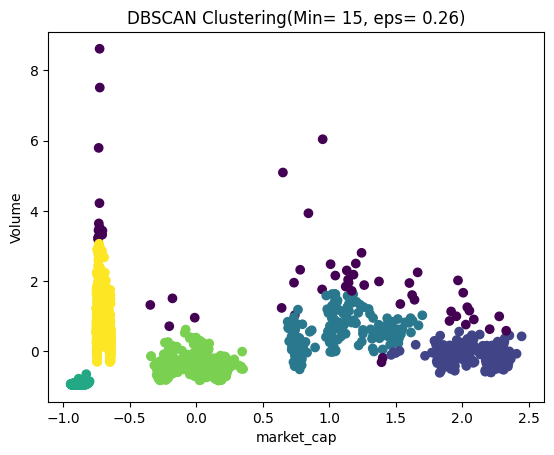

In [82]:
data = df

# Scaling the MarketCap and Volume
scaler = StandardScaler()
data[['market_cap', 'volume']] = scaler.fit_transform(data[['market_cap', 'volume']])

#DBSCAN parameters
eps = 0.26
min_samples = 15

# DBScan Function
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['cluster'] = dbscan.fit_predict(data[['market_cap', 'volume']])

# Visualizing 
plt.scatter(data['market_cap'], data['volume'], c=data['cluster'], cmap='viridis')
plt.title('DBSCAN Clustering(Min= 15, eps= 0.26)')
plt.xlabel('market_cap')
plt.ylabel('Volume')
plt.show()



As you see, when we go higher than 0.25 the purple cluster is loosing its efficiency.

Minimum Points = 15
Eps = 0.27

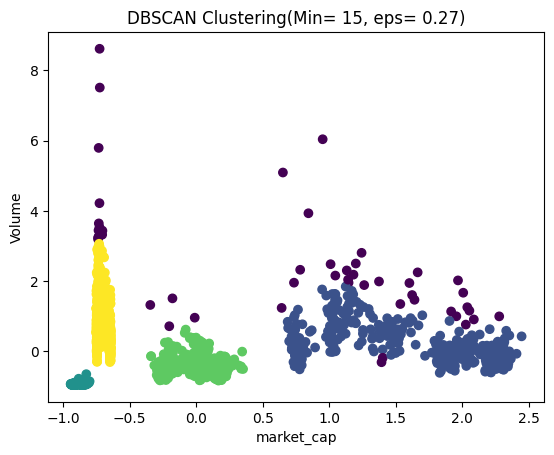

In [83]:
data = df

# Scaling the MarketCap and Volume
scaler = StandardScaler()
data[['market_cap', 'volume']] = scaler.fit_transform(data[['market_cap', 'volume']])

#DBSCAN parameters
eps = 0.27
min_samples = 15

# DBScan Function
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['cluster'] = dbscan.fit_predict(data[['market_cap', 'volume']])

# Visualizing 
plt.scatter(data['market_cap'], data['volume'], c=data['cluster'], cmap='viridis')
plt.title('DBSCAN Clustering(Min= 15, eps= 0.27)')
plt.xlabel('market_cap')
plt.ylabel('Volume')
plt.show()



and when we reached to eps = 0.27, the purple and blue clusters merged so the condition of having 5 clusters is fully gone.

----
---

Now as we said, also Min_points 10 with eps = 0.21 is another efficient DBScan that we found, so we drew it in the end:

Minimum Points = 10
Eps = 0.21

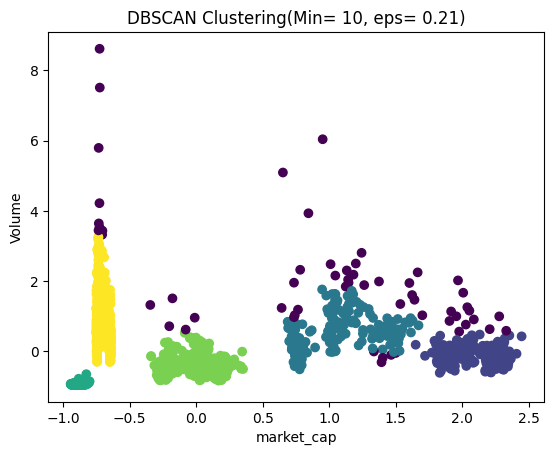

In [84]:
data = df

# Scaling the MarketCap and Volume
scaler = StandardScaler()
data[['market_cap', 'volume']] = scaler.fit_transform(data[['market_cap', 'volume']])

#DBSCAN parameters
eps = 0.21
min_samples = 10

# DBScan Function
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['cluster'] = dbscan.fit_predict(data[['market_cap', 'volume']])

# Visualizing 
plt.scatter(data['market_cap'], data['volume'], c=data['cluster'], cmap='viridis')
plt.title('DBSCAN Clustering(Min= 10, eps= 0.21)')
plt.xlabel('market_cap')
plt.ylabel('Volume')
plt.show()
